In [1]:
# Load Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import sklearn
from sklearn.neighbors import KernelDensity

# 3(a)

In [2]:
# Loading full and 2012 data
df = pd.read_csv('hour.csv')
df_2012 = df[df['yr']==1]

In [3]:
df_2012

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
8645,8646,2012-01-01,1,1,1,0,0,0,0,1,0.36,0.3788,0.66,0.0000,5,43,48
8646,8647,2012-01-01,1,1,1,1,0,0,0,1,0.36,0.3485,0.66,0.1343,15,78,93
8647,8648,2012-01-01,1,1,1,2,0,0,0,1,0.32,0.3485,0.76,0.0000,16,59,75
8648,8649,2012-01-01,1,1,1,3,0,0,0,1,0.30,0.3333,0.81,0.0000,11,41,52
8649,8650,2012-01-01,1,1,1,4,0,0,0,1,0.28,0.3030,0.81,0.0896,0,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [4]:
# Averaging hourly demand for 2012
hr = np.linspace(0,23,24)
Avg_hr_demand = []
for h in hr:
    avg = sum(df_2012[df_2012['hr']==h].cnt)/len(df_2012[df_2012['hr']==h].cnt)
    Avg_hr_demand.append(avg)

<Figure size 7200x1080 with 0 Axes>

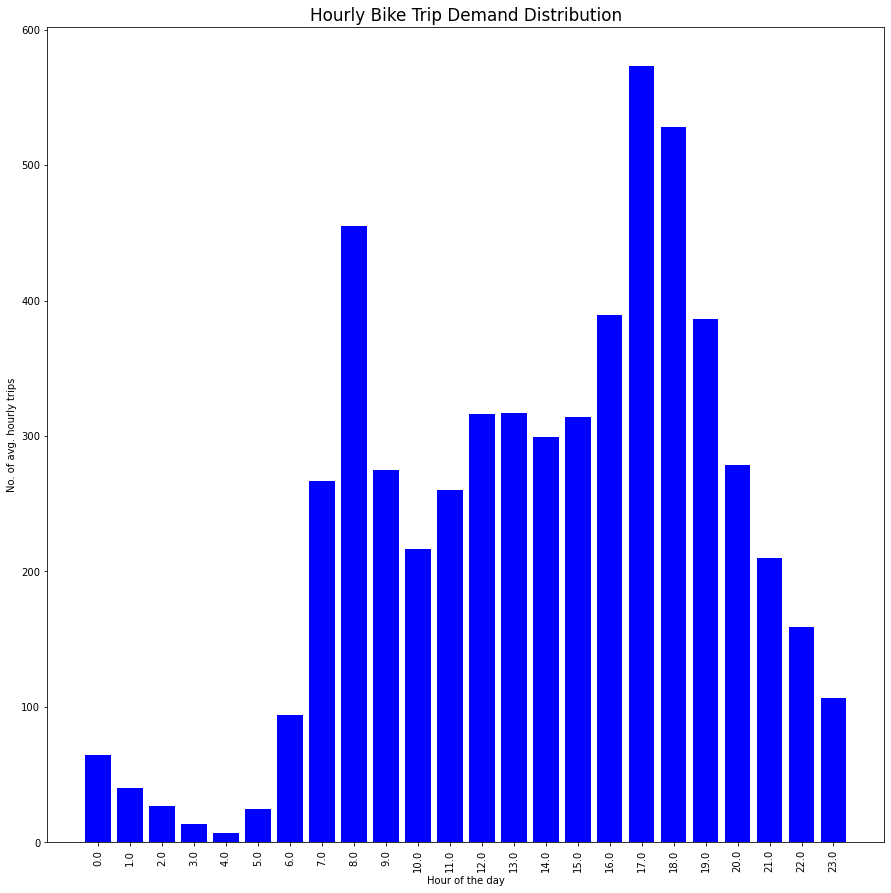

<Figure size 7200x1080 with 0 Axes>

In [5]:
# Plotting average hourly demand for year 2012
plt.figure(figsize=(15,15))
plt.bar(hr,Avg_hr_demand,align='center',color='b')
from matplotlib import rcParams
rcParams["font.family"] = "Times New Roman"
rcParams.update({'font.size': 14})
position=np.linspace(0,23,24)
plt.xticks(position, np.linspace(0,23,24), rotation=90)
plt.xlabel('Hour of the day')
plt.ylabel('No. of avg. hourly trips')
plt.title('Hourly Bike Trip Demand Distribution')

Text(0.5, 1.0, 'Hourly demand histogram')

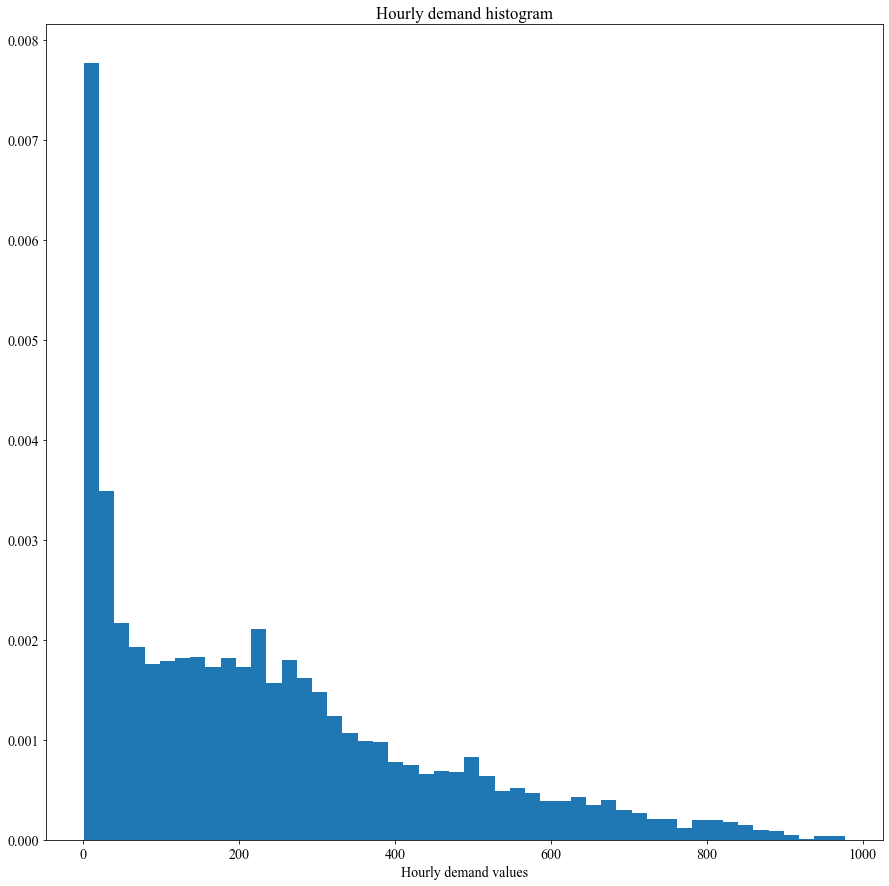

In [10]:
X = df_2012.cnt[:, np.newaxis]
X_plot = np.linspace(1,1000,1000)[:, np.newaxis]
plt.figure(figsize=(15,15))
plt.hist(X,bins=50,density=True)
plt.xlabel('Hourly demand values')
plt.title("Hourly demand histogram")


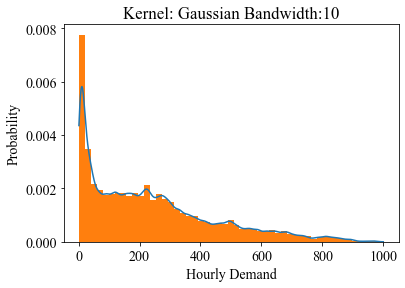

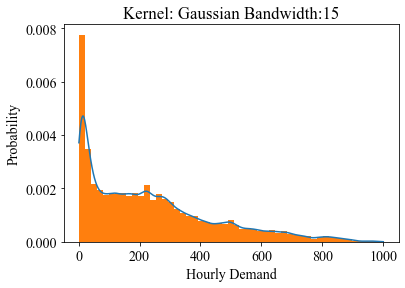

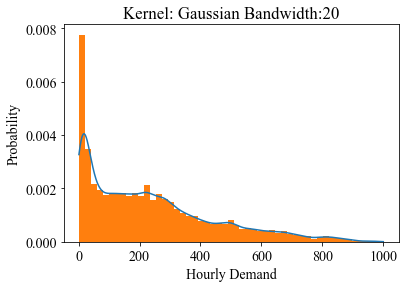

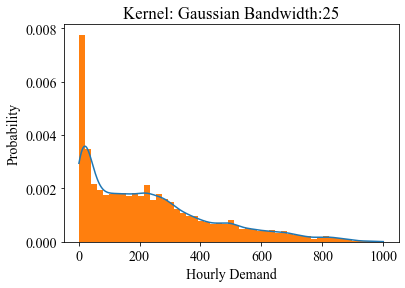

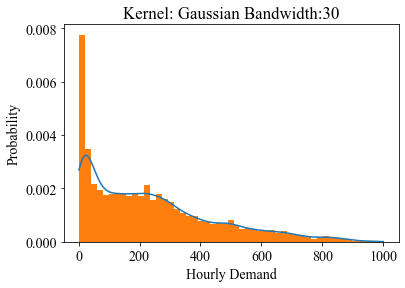

In [14]:
for bwidth in range (10,31,5):
    
    X = df_2012.cnt[:, np.newaxis]
    X_plot = np.linspace(1,1000,1000)[:, np.newaxis]
    kde = KernelDensity(kernel='gaussian', bandwidth= bwidth).fit(X)
    log_dens = kde.score_samples(X_plot)
    fig, ax = plt.subplots()
    ax.plot(X_plot[:, 0], np.exp(log_dens))
    plt.hist(X,bins=50,density=True)
    plt.xlabel('Hourly Demand')
    plt.ylabel('Probability')
    plt.title("Kernel: Gaussian Bandwidth:{:.0f}".format(bwidth))
    plt.show()

# 3(b)

In [15]:
from sklearn import neighbors
df_2012.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,8734.000000,8734.000000,8734.0,8734.000000,8734.000000,8734.000000,8734.000000,8734.000000,8734.000000,8734.000000,8734.000000,8734.000000,8734.000000,8734.000000,8734.000000,8734.000000
mean,13012.500000,2.489810,1.0,6.501946,11.520151,0.029883,2.994733,0.681704,1.413098,0.504825,0.482481,0.611193,0.189034,42.679757,191.986604,234.666361
std,2521.432959,1.108279,0.0,3.449086,6.921208,0.170275,2.005254,0.465842,0.624470,0.186752,0.166587,0.188184,0.121490,56.970413,175.481637,208.910941
min,8646.000000,1.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.015200,0.160000,0.000000,0.000000,0.000000,1.000000
25%,10829.250000,2.000000,1.0,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.460000,0.104500,5.000000,46.000000,53.000000
50%,13012.500000,2.000000,1.0,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.520000,0.484800,0.610000,0.164200,20.000000,156.000000,191.000000
75%,15195.750000,3.000000,1.0,9.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.770000,0.253700,60.000000,275.000000,347.000000
max,17379.000000,4.000000,1.0,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,0.924200,1.000000,0.806000,367.000000,886.000000,977.000000


In [16]:
df_2012.shape

(8734, 17)

In [8]:
def find_outliers(x):
    Q1=np.percentile(x,25)
    Q3=np.percentile(x,75)
    IQR=Q3-Q1
    lower=Q1-1.5*IQR
    upper=Q3+1.5*IQR
    outlier_ind=list(x.index[(x<lower)|(x>upper)])
    outlier_value=list(x[outlier_ind])
    return outlier_ind,outlier_value

In [9]:
find_outliers(df_2012['temp'])[0]
df_2012=df_2012.drop(find_outliers(df_2012['temp'])[0],axis=0)

In [10]:
find_outliers(df_2012['atemp'])[0]
df_2012=df_2012.drop(find_outliers(df_2012['temp'])[0],axis=0)

In [11]:
find_outliers(df_2012['hum'])[0]
df_2012=df_2012.drop(find_outliers(df_2012['temp'])[0],axis=0)

In [12]:
find_outliers(df_2012['windspeed'])[0]
df_2012=df_2012.drop(find_outliers(df_2012['temp'])[0],axis=0)

In [13]:
find_outliers(df_2012['casual'])[0]
df_2012=df_2012.drop(find_outliers(df_2012['temp'])[0],axis=0)

In [14]:
find_outliers(df_2012['registered'])[0]
df_2012=df_2012.drop(find_outliers(df_2012['temp'])[0],axis=0)

In [15]:
df_2012

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
8645,8646,2012-01-01,1,1,1,0,0,0,0,1,0.36,0.3788,0.66,0.0000,5,43,48
8646,8647,2012-01-01,1,1,1,1,0,0,0,1,0.36,0.3485,0.66,0.1343,15,78,93
8647,8648,2012-01-01,1,1,1,2,0,0,0,1,0.32,0.3485,0.76,0.0000,16,59,75
8648,8649,2012-01-01,1,1,1,3,0,0,0,1,0.30,0.3333,0.81,0.0000,11,41,52
8649,8650,2012-01-01,1,1,1,4,0,0,0,1,0.28,0.3030,0.81,0.0896,0,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


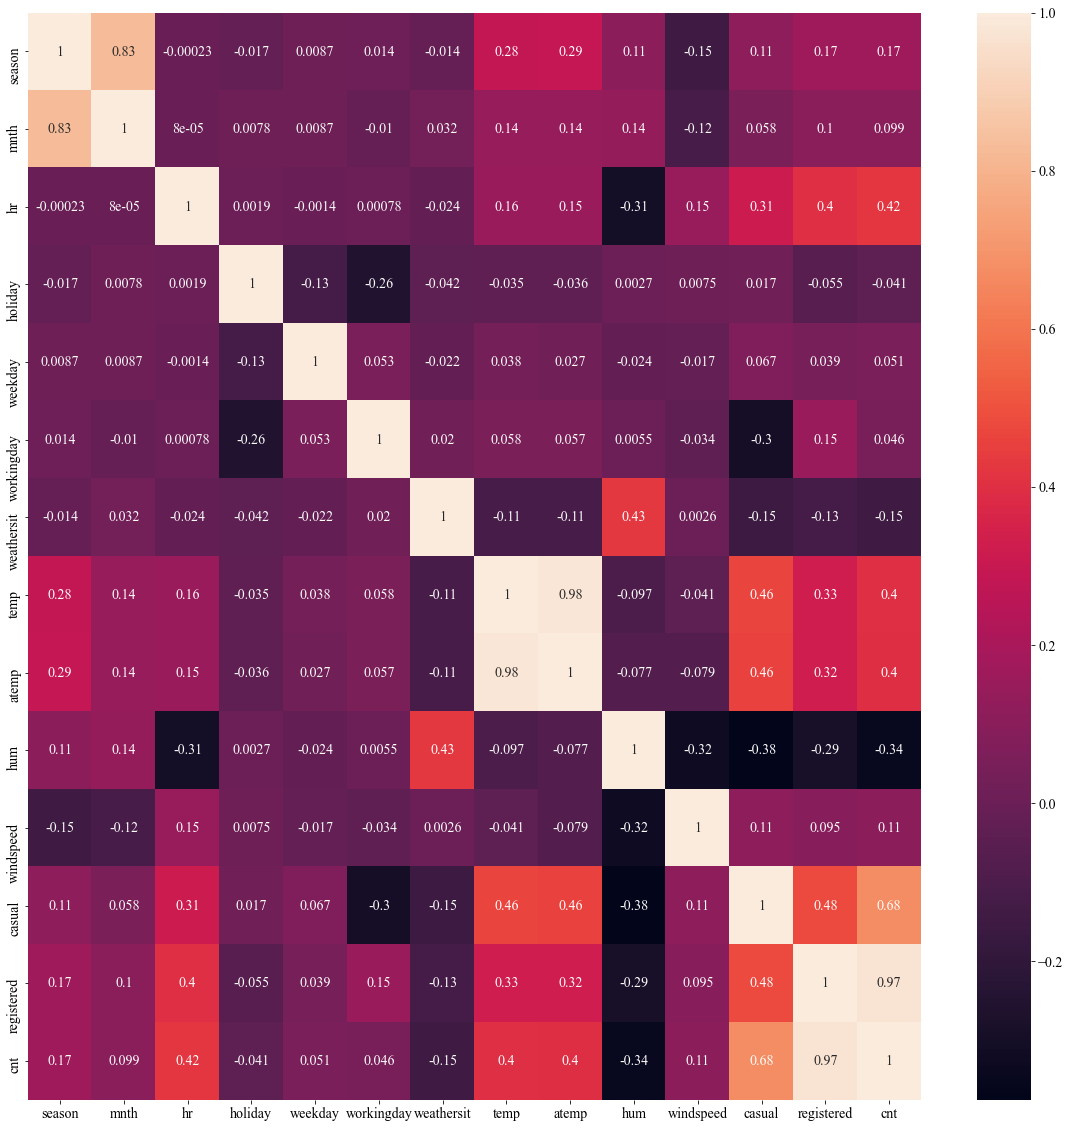

In [16]:
import seaborn as sns
corr_data =df_2012.iloc[:,[2,4,5,6,7,8,9,10,11,12,13,14,15,16]]

cor_mat=corr_data.corr()

fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(cor_mat,annot = True)

plt.show()

In [17]:
df_2012_feat_pre=df_2012[['season','hr','weathersit','temp','hum','windspeed','casual','registered','cnt']]

In [18]:
df_2012_feat_pre

,season,hr,weathersit,temp,hum,windspeed,casual,registered,cnt
8645,1,0,1,0.36,0.66,0.0000,5,43,48
8646,1,1,1,0.36,0.66,0.1343,15,78,93
8647,1,2,1,0.32,0.76,0.0000,16,59,75
8648,1,3,1,0.30,0.81,0.0000,11,41,52
8649,1,4,1,0.28,0.81,0.0896,0,8,8
...,...,...,...,...,...,...,...,...,...
17374,1,19,2,0.26,0.60,0.1642,11,108,119
17375,1,20,2,0.26,0.60,0.1642,8,81,89
17376,1,21,1,0.26,0.60,0.1642,7,83,90
17377,1,22,1,0.26,0.56,0.1343,13,48,61


In [19]:
X=df_2012_feat_pre.iloc[:,:-1]

In [20]:
y=df_2012_feat_pre.iloc[:,-1]

In [21]:
X_mod = pd.get_dummies(X, columns=['weathersit'])

In [22]:
X_mod = pd.get_dummies(X_mod, columns=['hr'])

In [23]:
X_mod = pd.get_dummies(X_mod, columns=['season'])

In [24]:
X_mod.columns

Index(['temp', 'hum', 'windspeed', 'casual', 'registered', 'weathersit_1',
       'weathersit_2', 'weathersit_3', 'weathersit_4', 'hr_0', 'hr_1', 'hr_2',
       'hr_3', 'hr_4', 'hr_5', 'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10',
       'hr_11', 'hr_12', 'hr_13', 'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18',
       'hr_19', 'hr_20', 'hr_21', 'hr_22', 'hr_23', 'season_1', 'season_2',
       'season_3', 'season_4'],
      dtype='object')

In [26]:
#splitting into fit and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_mod, y, test_size = 0.3, random_state = 0)

In [27]:
X_train.shape

(6113, 37)

In [28]:
from math import sqrt
from sklearn.metrics import mean_squared_error

In [29]:
Training_RMSE_knn=[]
Testing_RMSE_knn=[]
for K in range(1,30,2):
    print("K:",K)
    
    knn = neighbors.KNeighborsRegressor(n_neighbors = K)
    knn.fit(X_train,y_train)
     
    y_training_pred_knn = knn.predict(X_train)
    
   #training
    error_train_knn = sqrt(mean_squared_error(y_train,y_training_pred_knn))
    print("training RMSE for knn regression:",error_train_knn)
    Training_RMSE_knn.append(error_train_knn)
     
    y_test_pred_knn = knn.predict(X_test)
    #testing 
    error_test_knn = sqrt(mean_squared_error(y_test,y_test_pred_knn))
    print("testing RMSE for knn regression:",error_test_knn)
    Testing_RMSE_knn.append(error_test_knn)
    print("")

K: 1
training RMSE for knn regression: 0.0
testing RMSE for knn regression: 4.4845318959541185

K: 3
training RMSE for knn regression: 1.9393300763667352
testing RMSE for knn regression: 4.264715629209586

K: 5
training RMSE for knn regression: 2.3634423291849025
testing RMSE for knn regression: 4.3649780289753615

K: 7
training RMSE for knn regression: 2.6657770900493816
testing RMSE for knn regression: 4.27573464266204

K: 9
training RMSE for knn regression: 2.8559942366283186
testing RMSE for knn regression: 4.163565055840469

K: 11
training RMSE for knn regression: 3.0676474877609072
testing RMSE for knn regression: 4.434262414410805

K: 13
training RMSE for knn regression: 3.2778891659501492
testing RMSE for knn regression: 4.526324524179744

K: 15
training RMSE for knn regression: 3.527125818099893
testing RMSE for knn regression: 4.632421908660346

K: 17
training RMSE for knn regression: 3.7500893531979727
testing RMSE for knn regression: 4.787315675795072

K: 19
training RMSE f

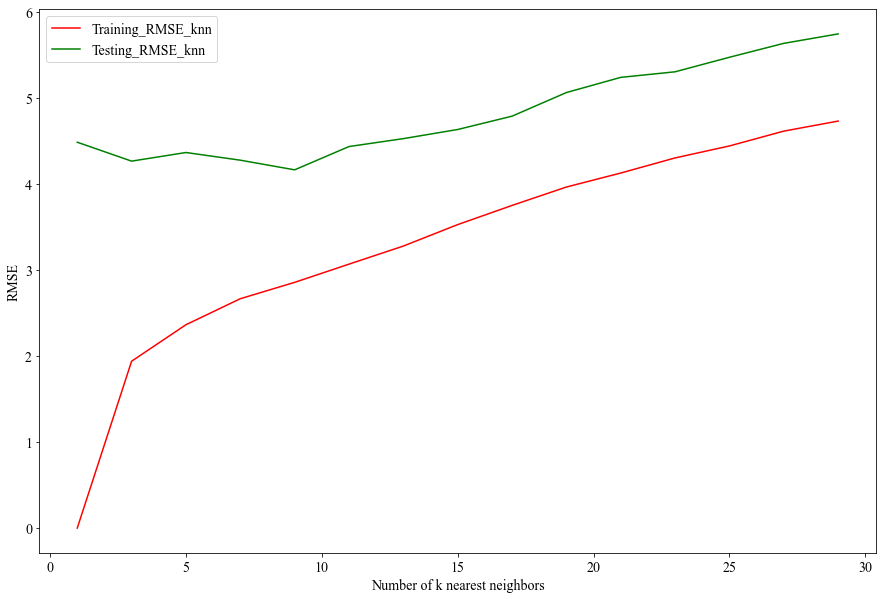

In [30]:
no_neighbor=range(1,30,2)
Training_RMSE_knn=np.array(Training_RMSE_knn) 
Testing_RMSE_knn=np.array(Testing_RMSE_knn) 
plt.figure(figsize=(15,10))
TA_inter,=plt.plot(no_neighbor,Training_RMSE_knn,label="Training_RMSE_knn",color="red")
VA_inter,=plt.plot(no_neighbor,Testing_RMSE_knn,label="Testing_RMSE_knn",color="green")
plt.legend([TA_inter,VA_inter],['Training_RMSE_knn','Testing_RMSE_knn'],fontsize=14)
plt.xlabel("Number of k nearest neighbors")
plt.ylabel("RMSE")
rcParams['font.family'] = 'Times New Roman'
rcParams.update({'font.size': 14})
plt.show()

In [31]:
knn = neighbors.KNeighborsRegressor(n_neighbors = 9)
knn.fit(X_train,y_train)
     
y_training_pred = knn.predict(X_train)
    
#training
error_train = sqrt(mean_squared_error(y_train,y_training_pred))
print("training RMSE:",error_train)

y_test_pred = knn.predict(X_test)
#testing 
error_test = sqrt(mean_squared_error(y_test,y_test_pred))
print("testing RMSE:",error_test)


training RMSE: 2.8559942366283186
testing RMSE: 4.163565055840469


In [75]:
y_test

14645    224
14653    792
11361    114
11728    223
12755    335
        ... 
12374    645
14025    579
8905      49
14608    296
15324    900
Name: cnt, Length: 2621, dtype: int64